### Installing ultralytics for using yolov8

In [ ]:
!pip install ultralytics==8.0.134

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 629.1/629.1 kB 5.9 MB/s eta 0:00:00


In [ ]:
import torch
print('torch %s' % (torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

torch _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15101MB, multi_processor_count=40)


### Download the dataset by going to a particular dataset on roboflow and click on generate code to download the dataset :🇩

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="INSERT YOUR API KEY HERE")
project = rf.workspace("some-mqxjz").project("face-mask-brija")
dataset = project.version(1).download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.1 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.0.76
    Uninstalling opencv-python-headless-4.8.0.76:
      Successfully uninstalled 

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Face-Mask-1 in yolov8:: 100%|██████████| 3192/3192 [00:00<00:00, 7588.68it/s]


### Model import and initialization

In [ ]:
from ultralytics import YOLO
model=YOLO()

100%|██████████| 6.23M/6.23M [00:00<00:00, 220MB/s]


### Training and Validation of data by using the model.train method of yolo instance.

In [ ]:
res = model.train(data='/content/Face-Mask-1/data.yaml',epochs =50 ,patience=10, workers=16, batch = 20, save=True, save_period=100,cache=True, project="/content/Face-Mask-1/models", name="maskdetector" )

New https://pypi.org/project/ultralytics/8.0.188 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Face-Mask-1/data.yaml, epochs=50, patience=10, batch=20, imgsz=640, save=True, save_period=100, cache=True, device=None, workers=16, project=/content/Face-Mask-1/models, name=maskdetector, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=Fa

### To see the parameters and variation of losses during training and validation

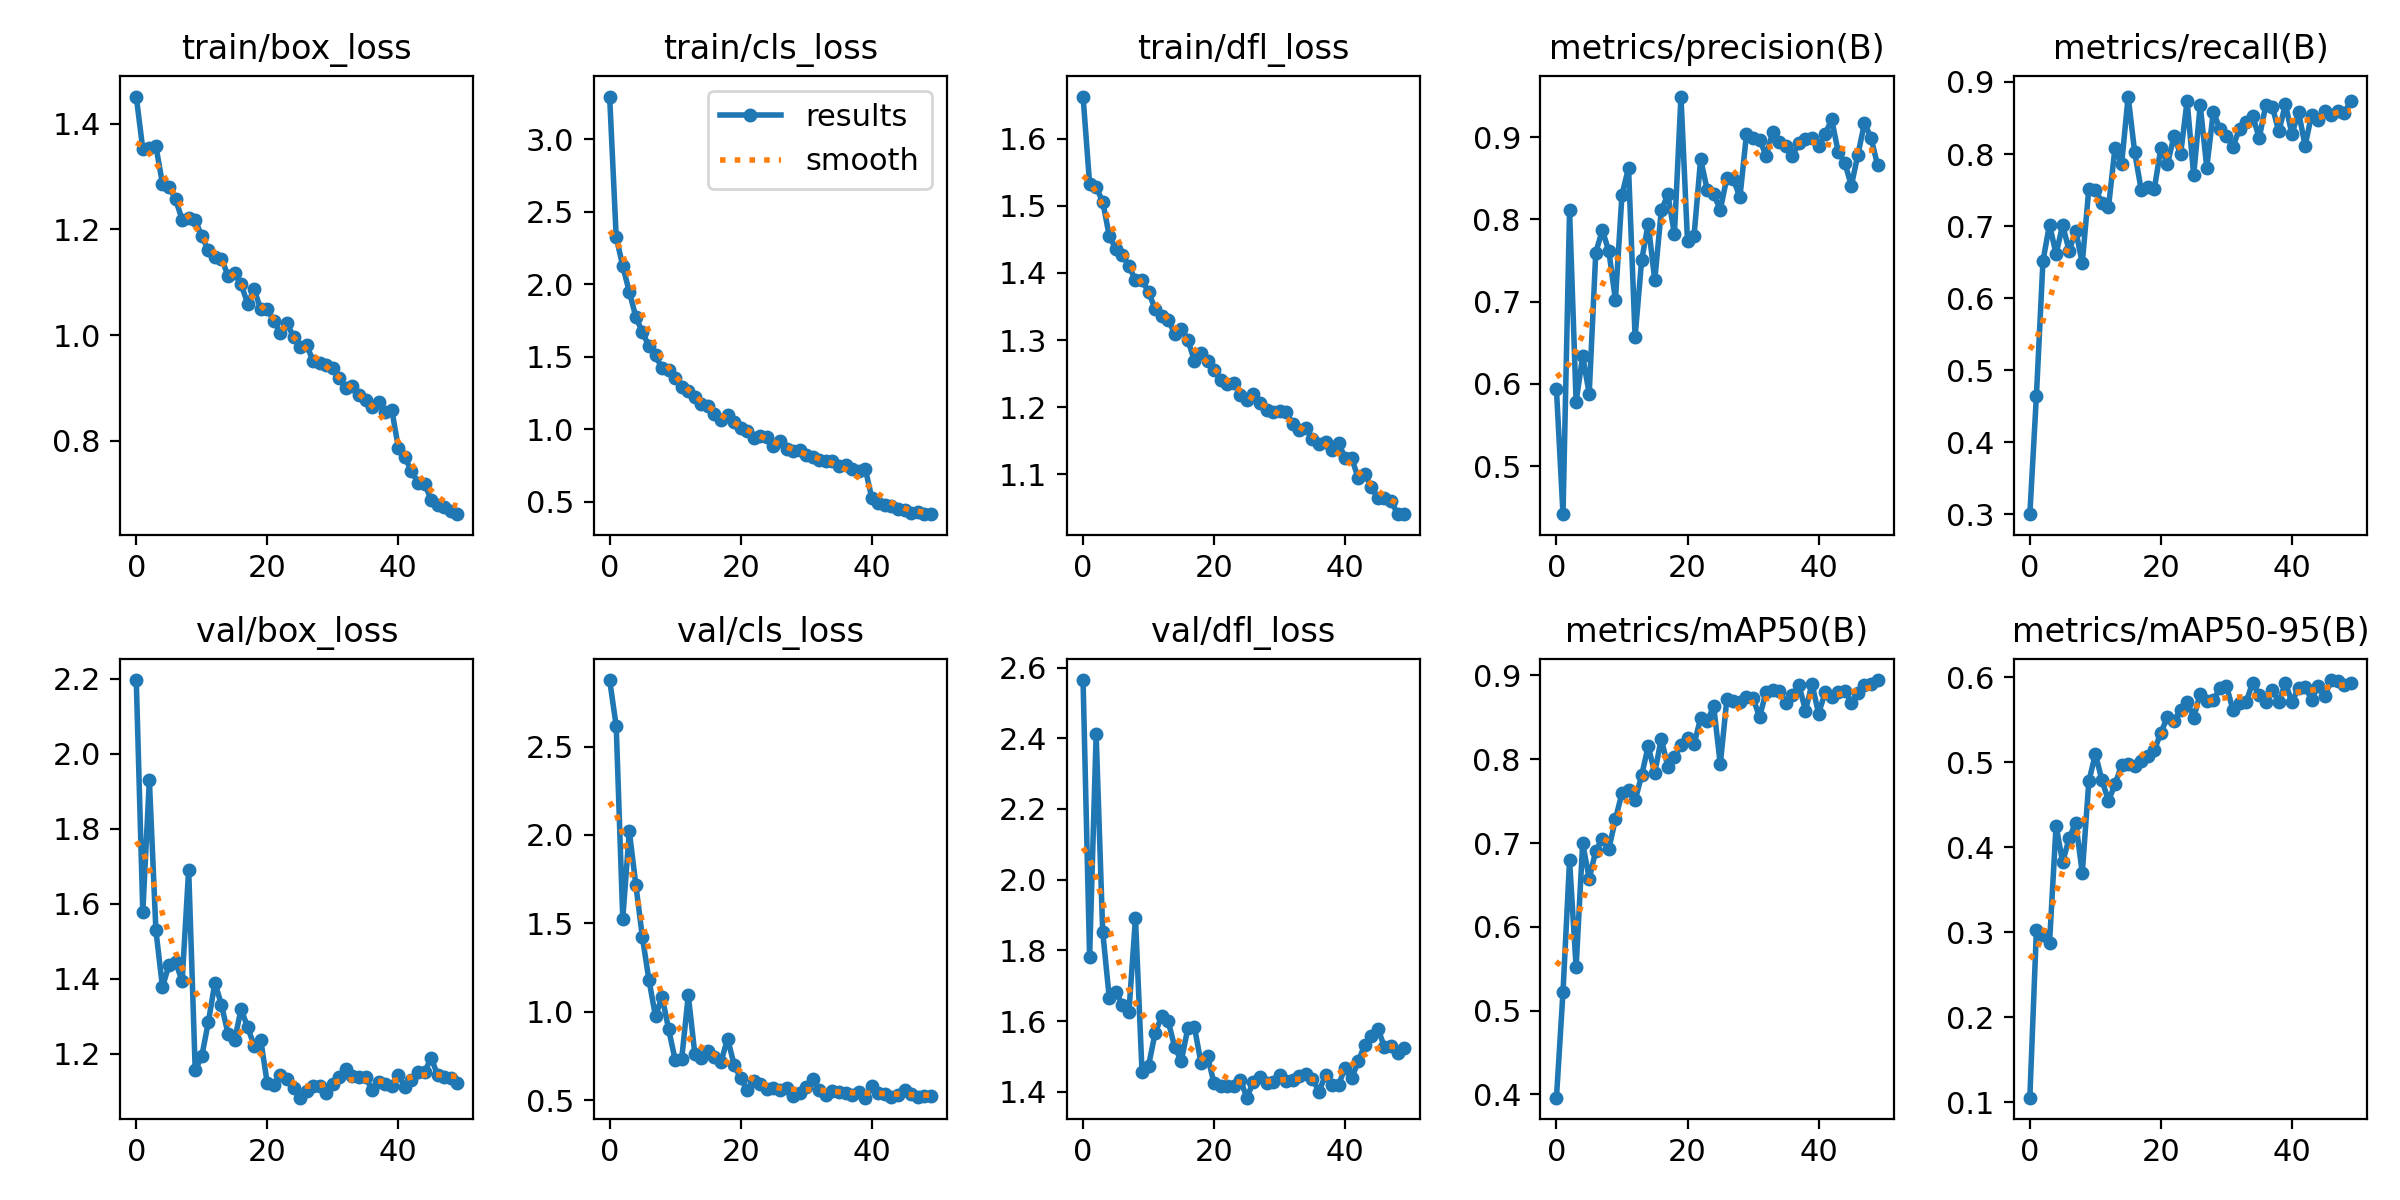

In [ ]:
from IPython.display import Image
Image('/content/Face-Mask-1/models/maskdetector/results.png')

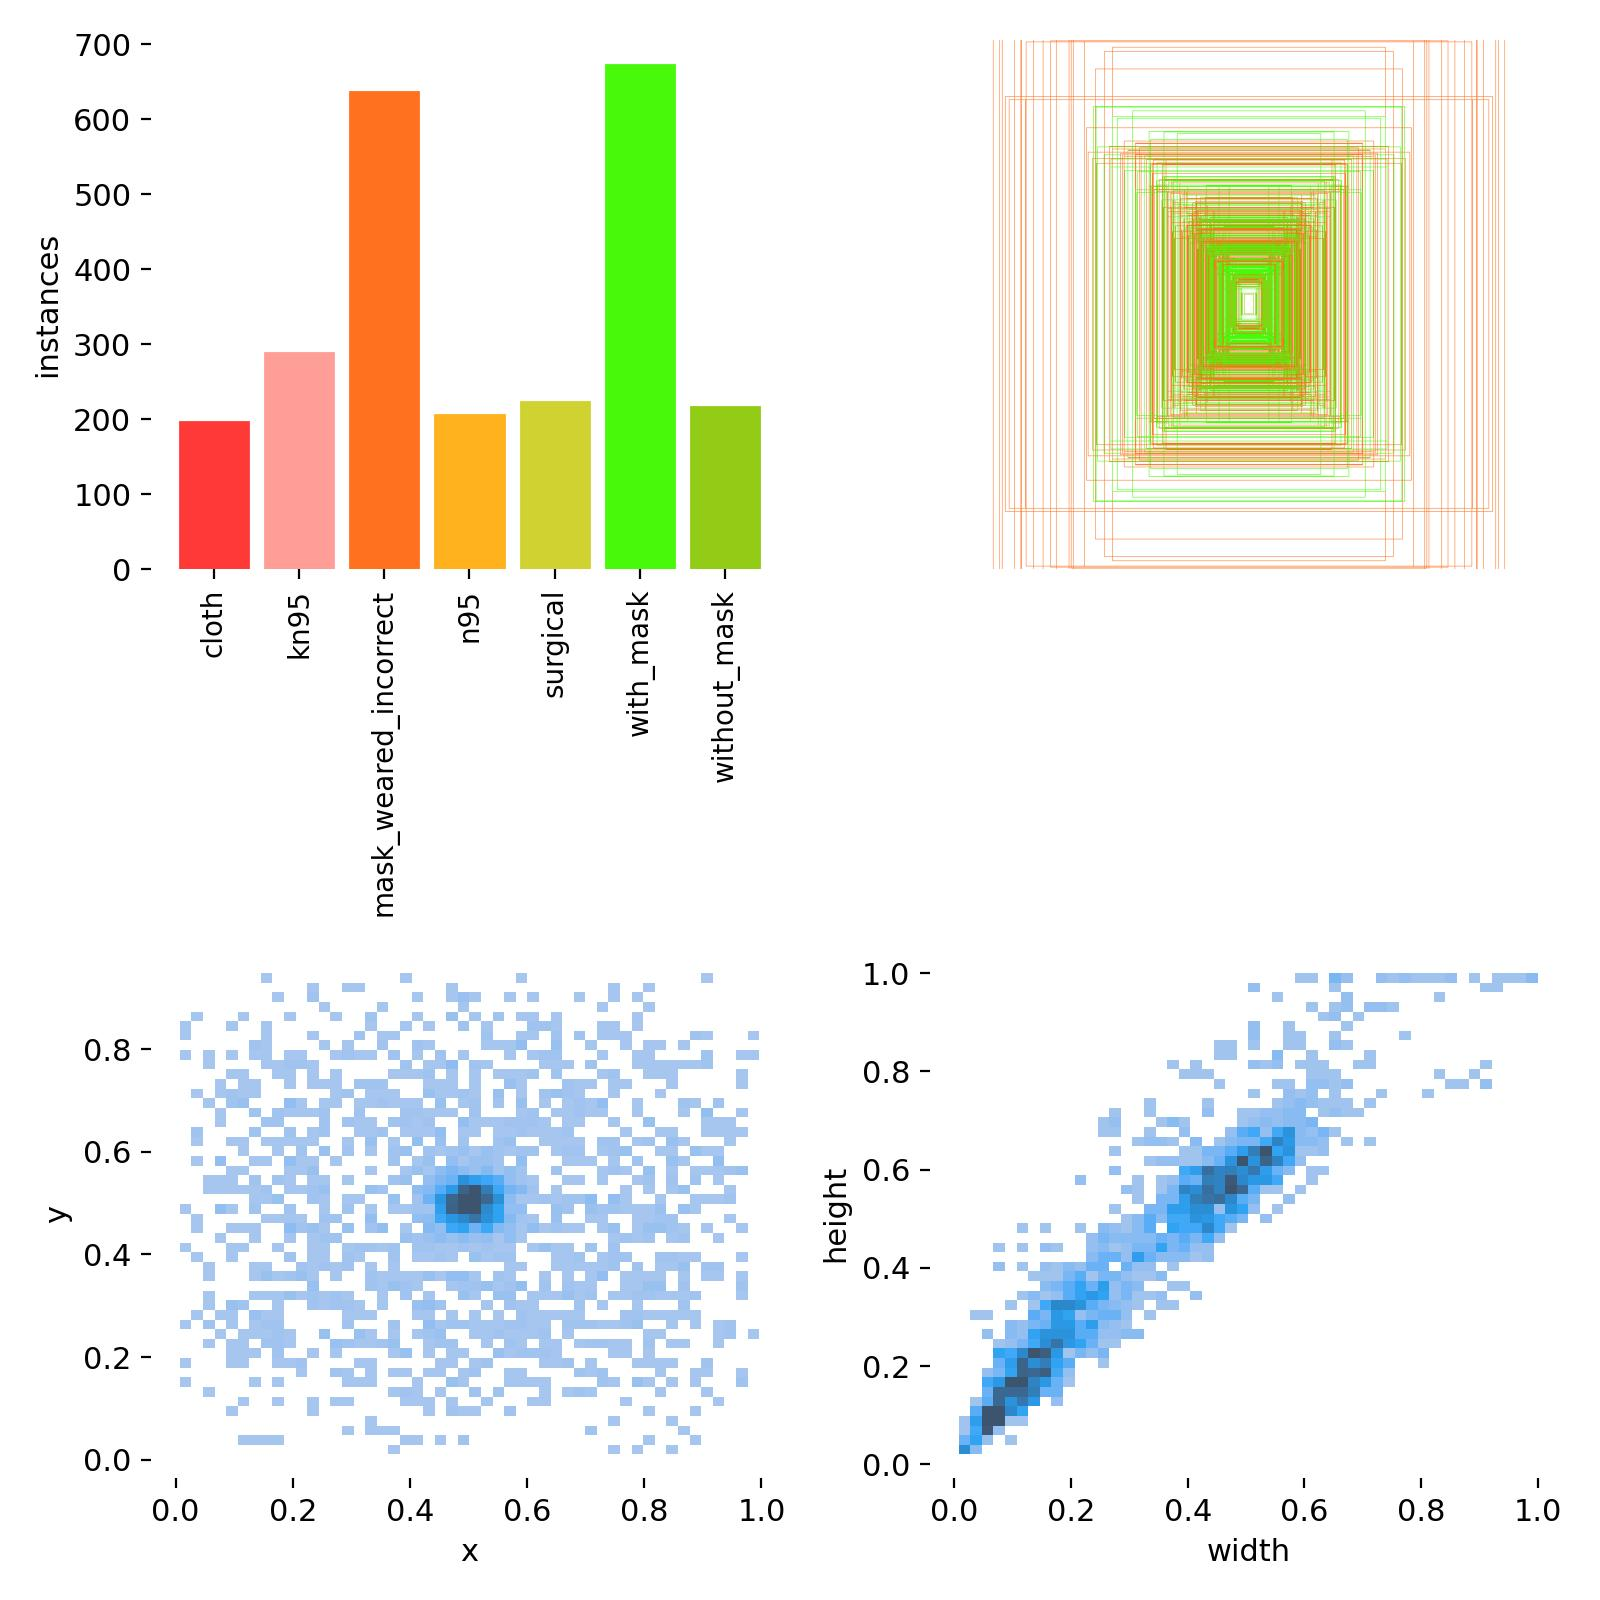

In [ ]:
Image("/content/Face-Mask-1/models/maskdetector/labels.jpg")

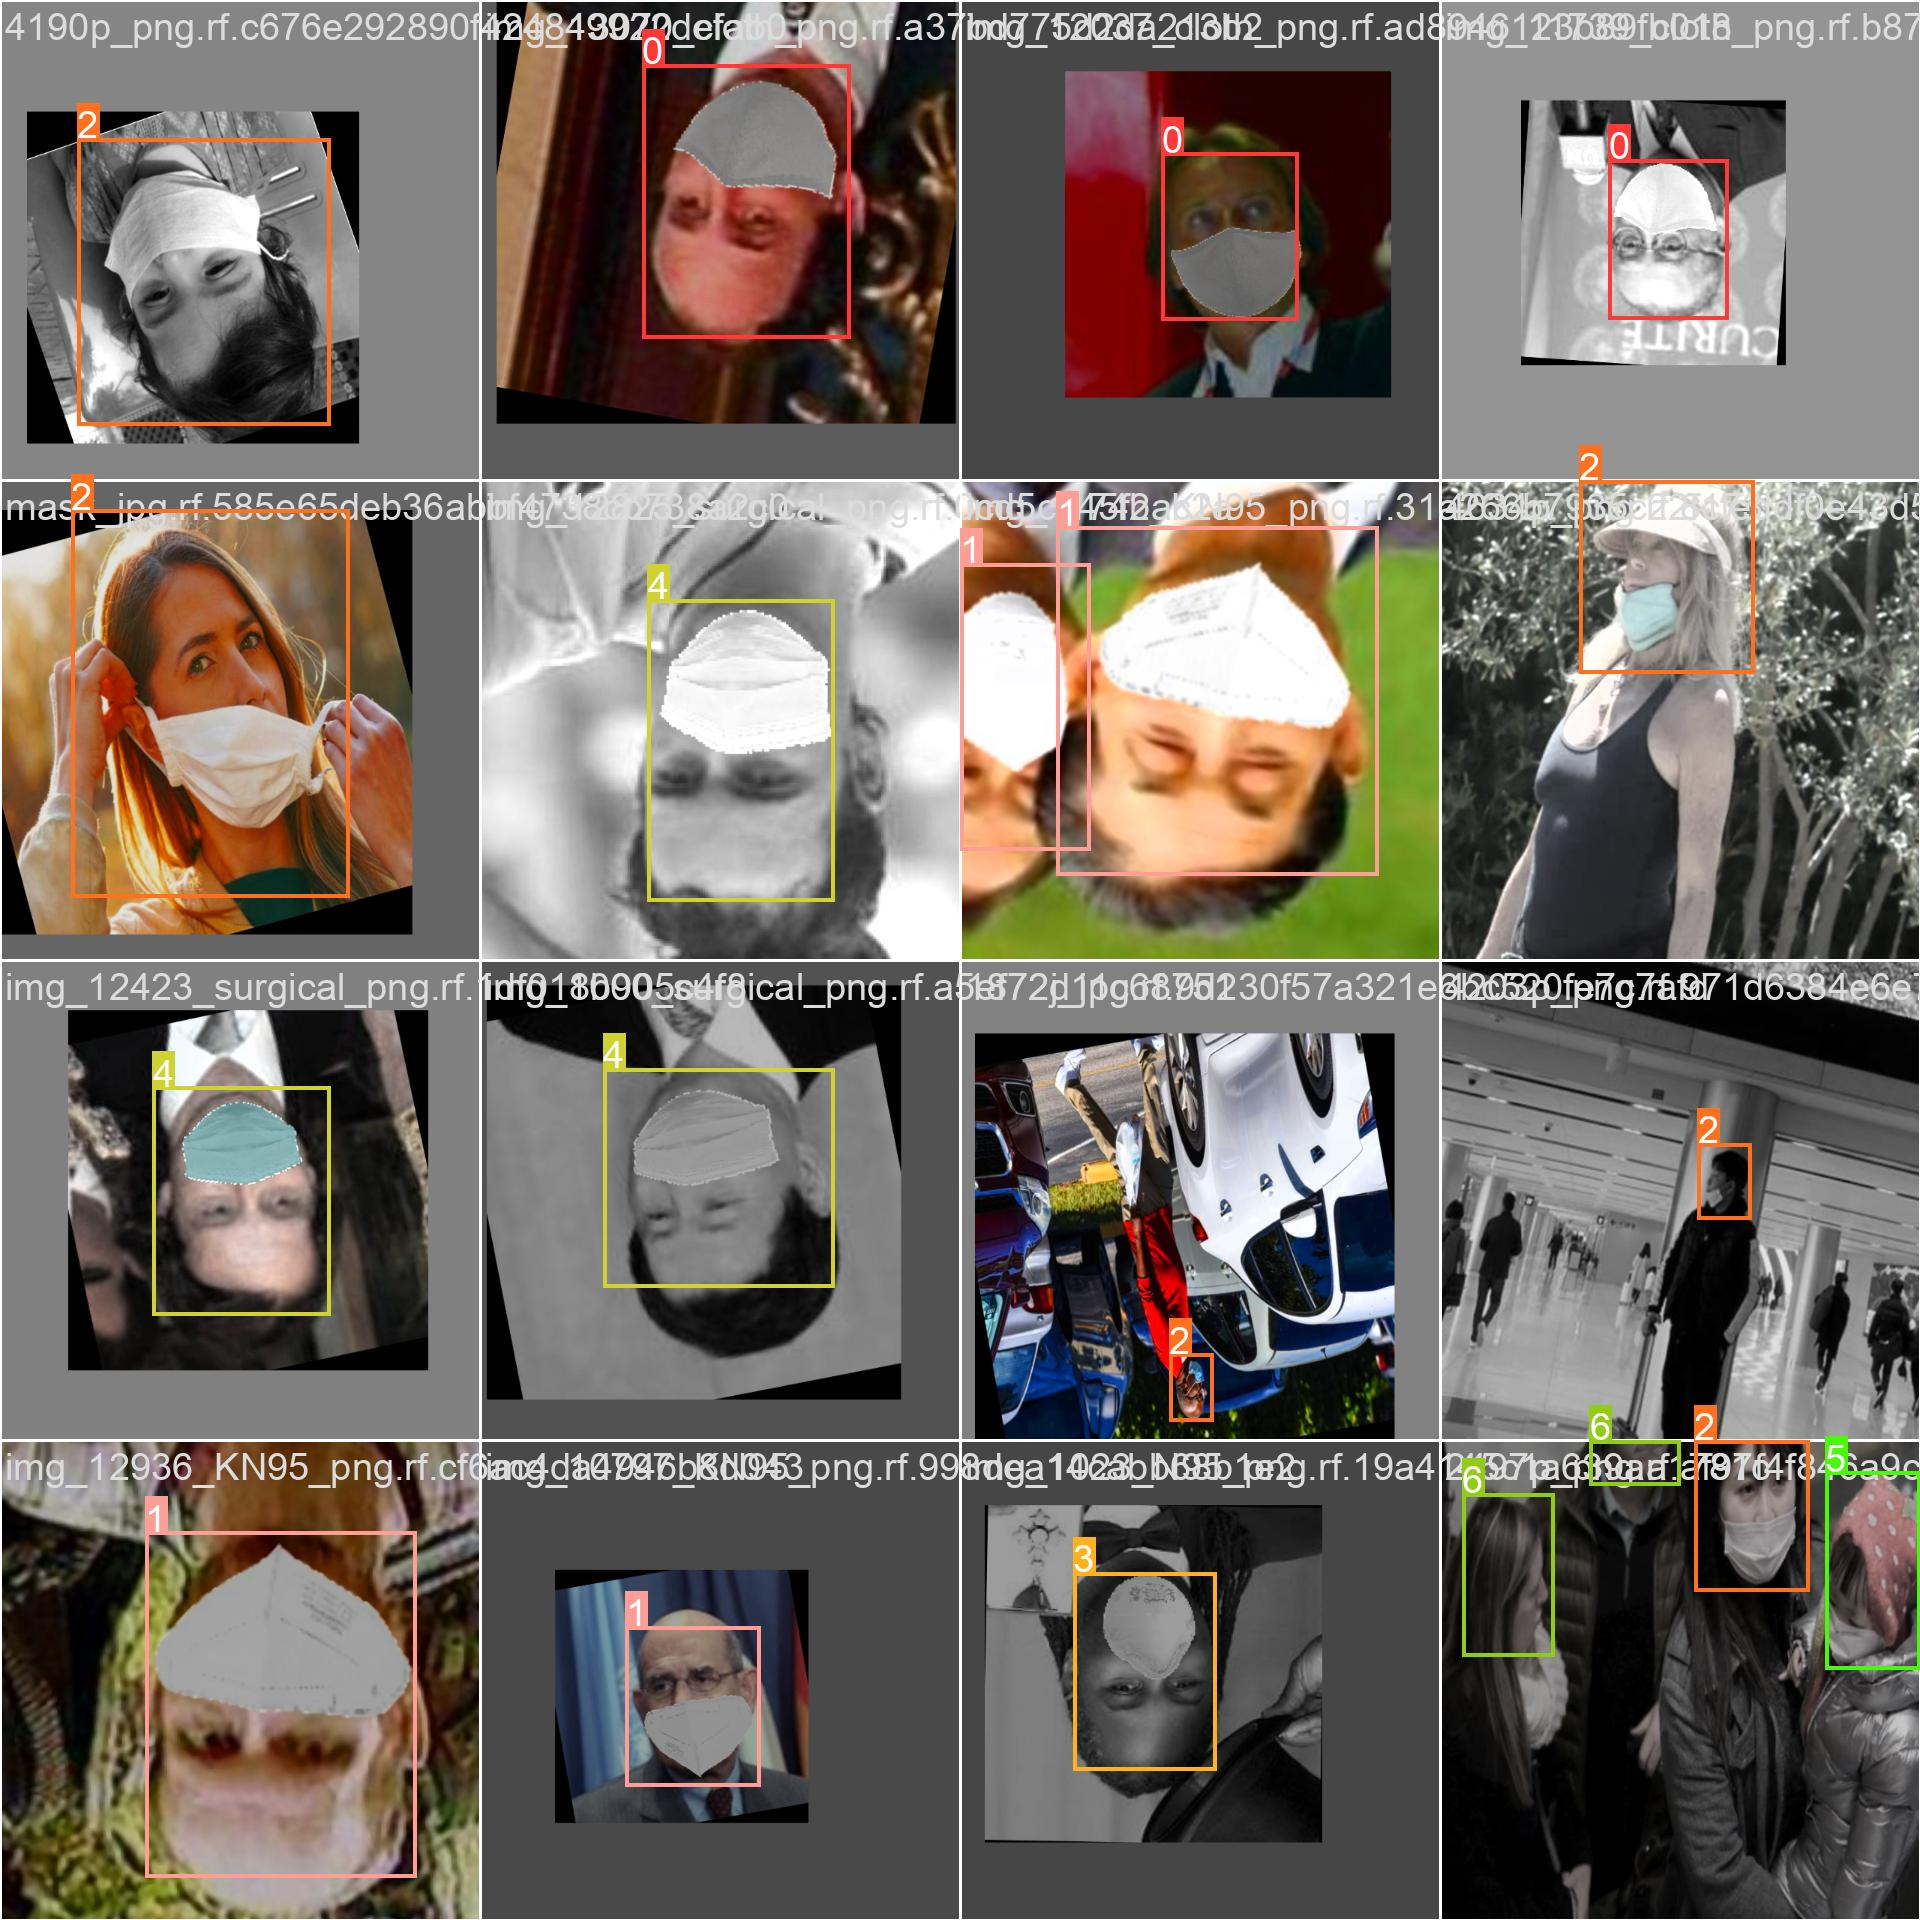

In [ ]:
Image("/content/Face-Mask-1/models/maskdetector/train_batch2920.jpg")

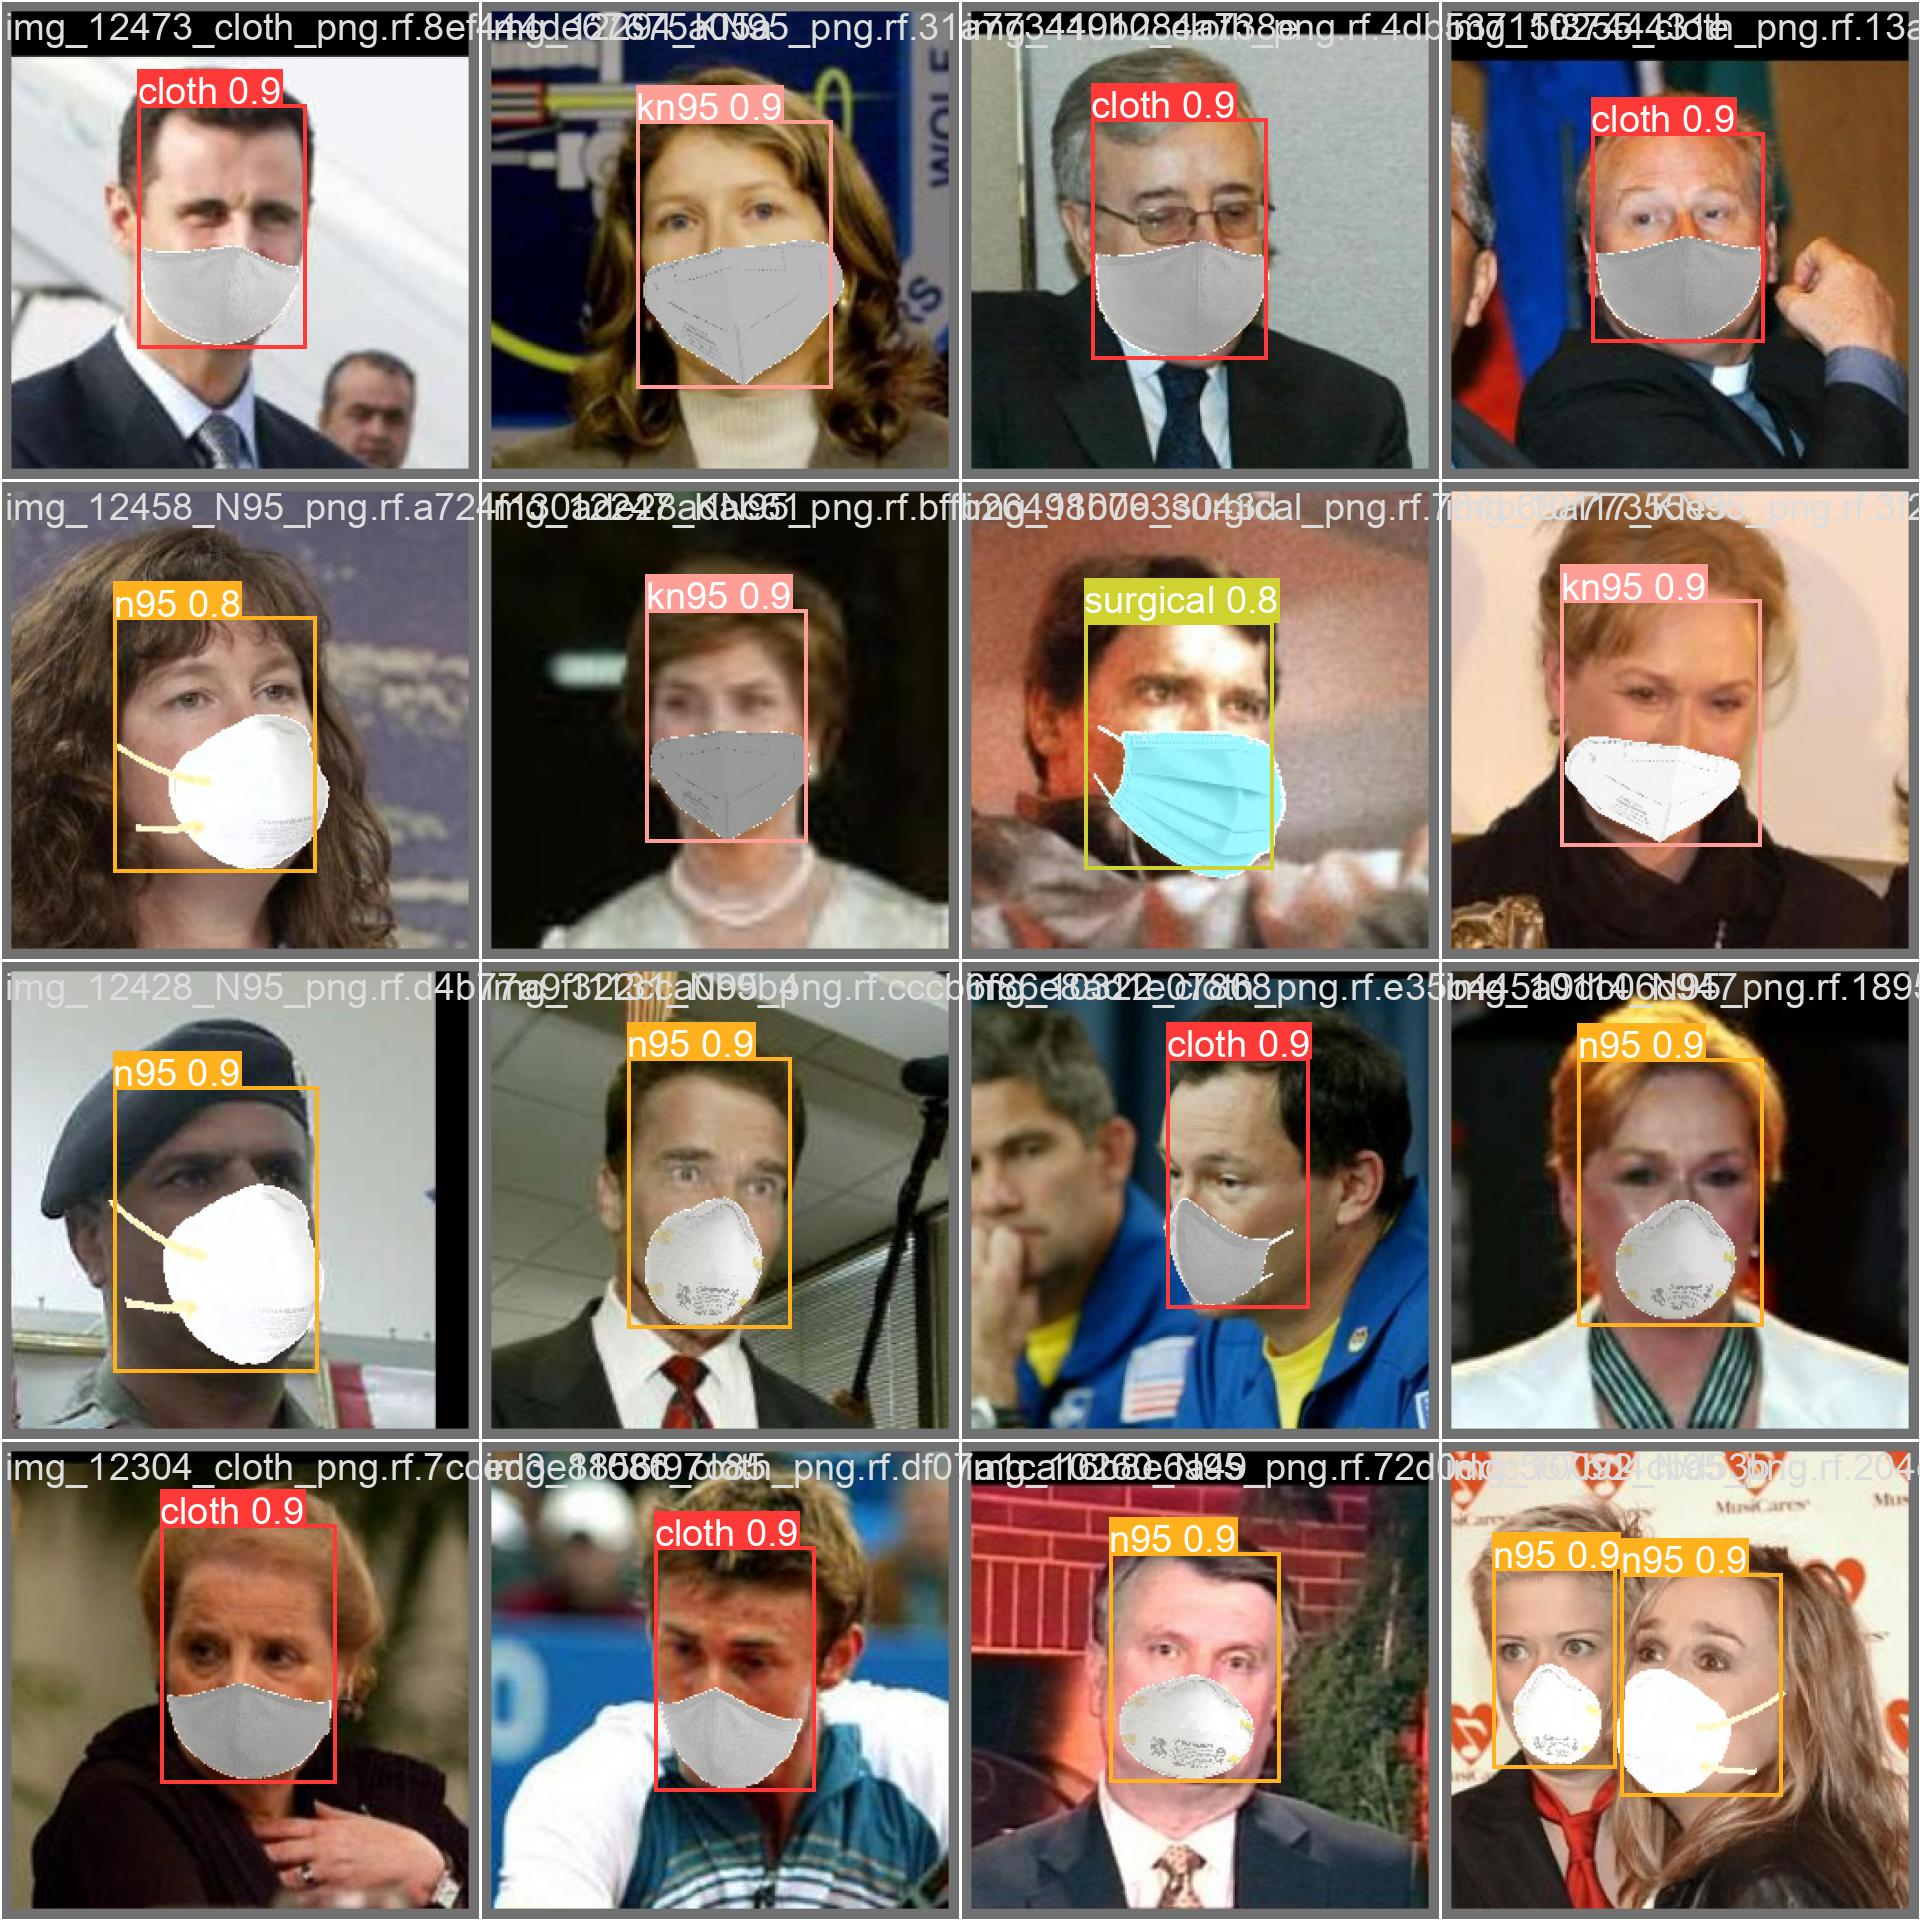

In [ ]:
Image("/content/Face-Mask-1/models/maskdetector/val_batch1_pred.jpg")

### Now lets access the best model and use it for inference on some test data

In [ ]:
prediction_model=YOLO('/content/Face-Mask-1/models/maskdetector/weights/best.pt')

In [ ]:
result=prediction_model.predict(source="/content/Face-Mask-1/test/images/img_10163_cloth_png.rf.0ae19f81604f5ae8daba4618c8123313.jpg",conf=0.7 ,project="/content/Face-Mask-1/", name="output",save=True )


image 1/1 /content/Face-Mask-1/test/images/img_10163_cloth_png.rf.0ae19f81604f5ae8daba4618c8123313.jpg: 640x640 1 cloth, 7.2ms
Speed: 1.8ms preprocess, 7.2ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/Face-Mask-1/output


### Before detection

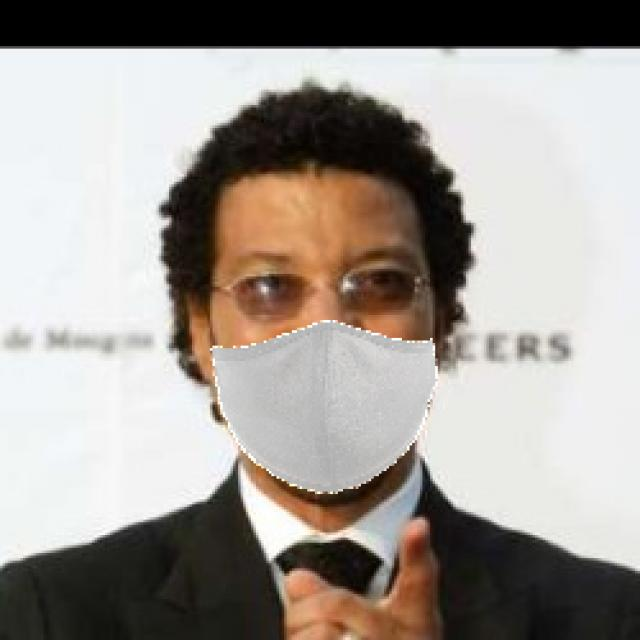

In [ ]:
Image('/content/Face-Mask-1/test/images/img_10163_cloth_png.rf.0ae19f81604f5ae8daba4618c8123313.jpg')

### After detection

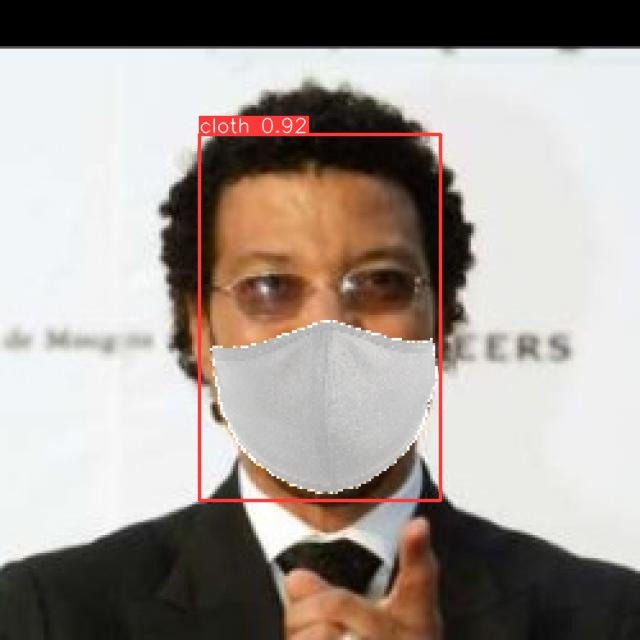

In [ ]:
Image('/content/Face-Mask-1/output/img_10163_cloth_png.rf.0ae19f81604f5ae8daba4618c8123313.jpg')

In [ ]:
result=prediction_model.predict(source="/content/Face-Mask-1/test/images/why-are-surgical-linens-and-gowns-green-1_jpg.rf.8930e981532b0ecb4a1318454d530504.jpg",conf=0.7 ,project="/content/Face-Mask-1/", name="output", save=True )


image 1/1 /content/Face-Mask-1/test/images/why-are-surgical-linens-and-gowns-green-1_jpg.rf.8930e981532b0ecb4a1318454d530504.jpg: 640x640 2 with_masks, 9.0ms
Speed: 1.9ms preprocess, 9.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/Face-Mask-1/output2


### Before Detection

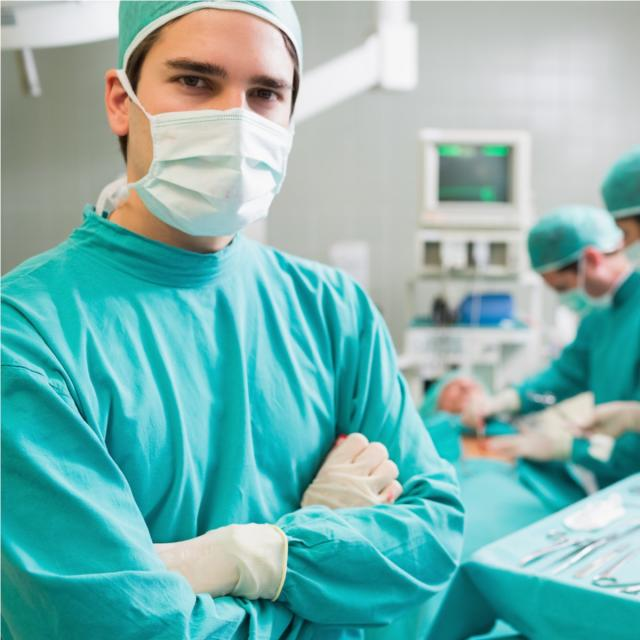

In [ ]:
Image("/content/Face-Mask-1/test/images/why-are-surgical-linens-and-gowns-green-1_jpg.rf.8930e981532b0ecb4a1318454d530504.jpg")

### After Detection


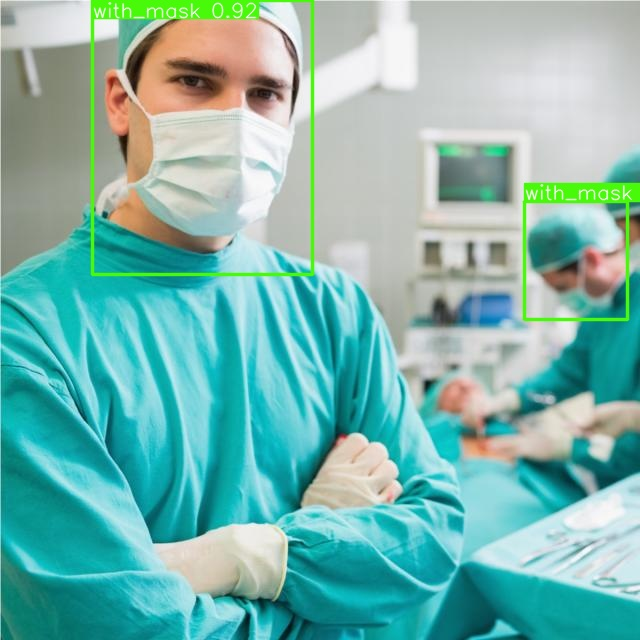

In [ ]:
Image("/content/Face-Mask-1/output2/why-are-surgical-linens-and-gowns-green-1_jpg.rf.8930e981532b0ecb4a1318454d530504.jpg")

In [ ]:
result=prediction_model.predict(source="/content/masktest.jpeg",conf=0.5 ,project="/content/Face-Mask-1/", name="output", save=True )


image 1/1 /content/masktest.jpeg: 384x640 1 mask_weared_incorrect, 14 with_masks, 99.8ms
Speed: 3.1ms preprocess, 99.8ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/Face-Mask-1/output3


### Before detection

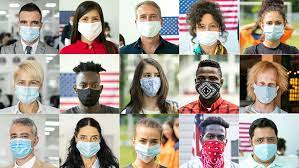

In [ ]:
Image("/content/masktest.jpeg")

### After detection

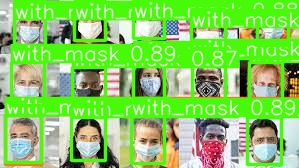

In [ ]:
Image("/content/Face-Mask-1/output3/masktest.jpeg")

In [ ]:
result=prediction_model.predict(source="/content/masktest2.jpeg",conf=0.7 ,project="/content/Face-Mask-1/", name="output", save=True )


image 1/1 /content/masktest2.jpeg: 384x640 6 with_masks, 14.0ms
Speed: 2.2ms preprocess, 14.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/Face-Mask-1/output4


### Before Detection

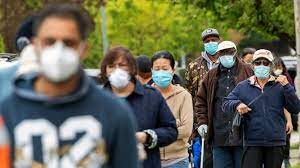

In [ ]:
Image("/content/masktest2.jpeg")

### After Detection

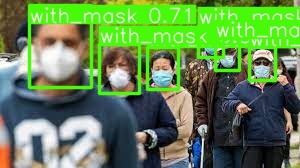

In [ ]:
Image("/content/Face-Mask-1/output4/masktest2.jpeg")

### Hope you enjoyed going through my work. Happy to take more suggestions from you.
